# The Sparks Foundation #GRIPFEB2021
# Name-Ketaki Bhide
# Task- Exploratory Data Analysis-Retail

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#visualisation
import matplotlib.pyplot as plt
#visualisation
%matplotlib inline

In [ ]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(5)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.tail(5) #bottom 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
df.dtypes # checking datatype

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
df.shape # checking number of rows and column

(9977, 13)

In [ ]:
df.count()

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

In [ ]:
duplicate_rows_df=df[df.duplicated()] # checking duplicated rows
duplicate_rows_df.shape

(0, 13)

In [ ]:
df=df.drop_duplicates() # dropping duplicate row value(here there are no duplicate )
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.count()

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

In [ ]:
print(df.isnull().sum()) # checking null values,there are no null values)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


# Checking Outliers

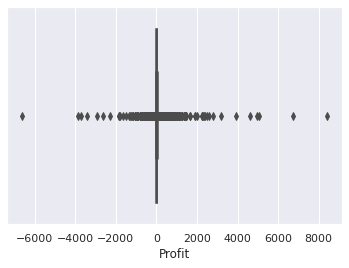

In [ ]:
sns.boxplot(x=df['Profit'])

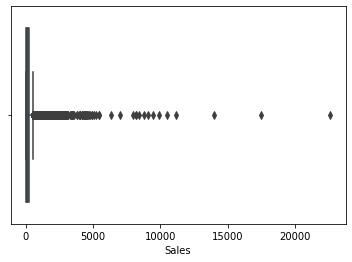

In [ ]:
sns.boxplot(x=df['Sales'])

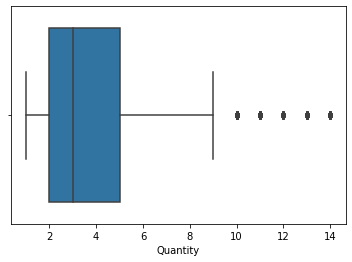

In [ ]:
sns.boxplot(x=df['Quantity'])

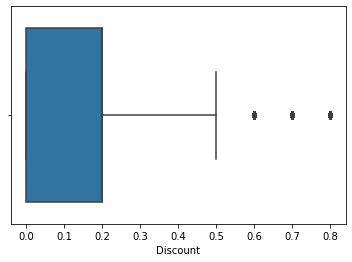

In [ ]:
sns.boxplot(x=df['Discount'])

In [ ]:
# finding IQR (Interquartile range)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Postal Code    66785.00000
Sales            192.66000
Quantity           3.00000
Discount           0.20000
Profit            27.63525
dtype: float64


In [ ]:
# Removing Outliers
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(7143, 13)

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000
mean,55591.522470,75.707309,3.407112,0.096742,13.001752
std,32804.639049,92.209665,1.879085,0.106372,17.187931
min,1040.000000,0.990000,1.000000,0.000000,-39.637000
25%,22204.000000,15.552000,2.000000,0.000000,3.240300
50%,55407.000000,37.752000,3.000000,0.000000,8.299200
75%,90036.000000,98.376000,4.000000,0.200000,19.623600
max,99301.000000,496.860000,9.000000,0.500000,70.722000


In [ ]:
df.max()

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City                      Yuma
State                Wisconsin
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                   496.86
Quantity                     9
Discount                   0.5
Profit                  70.722
dtype: object

In [ ]:
df.min()

Ship Mode         First Class
Segment              Consumer
Country         United States
City                 Aberdeen
State                 Alabama
Postal Code              1040
Region                Central
Category            Furniture
Sub-Category      Accessories
Sales                    0.99
Quantity                    1
Discount                    0
Profit                -39.637
dtype: object

In [ ]:
# finding correlation
c_1 = df["Sales"]
c_2 = df["Discount"]
correl = c_1.corr(c_2)
print(correl)


0.13753288755813614


In [ ]:
c_1=df["Discount"]
c_2=df["Profit"]
correl=c_2.corr(c_1)
print(correl)

-0.3106673072221724


In [ ]:
c_1 = df["Sales"]
c_2 = df["Quantity"]
correl = c_1.corr(c_2)
print(correl)

0.1278731969663592


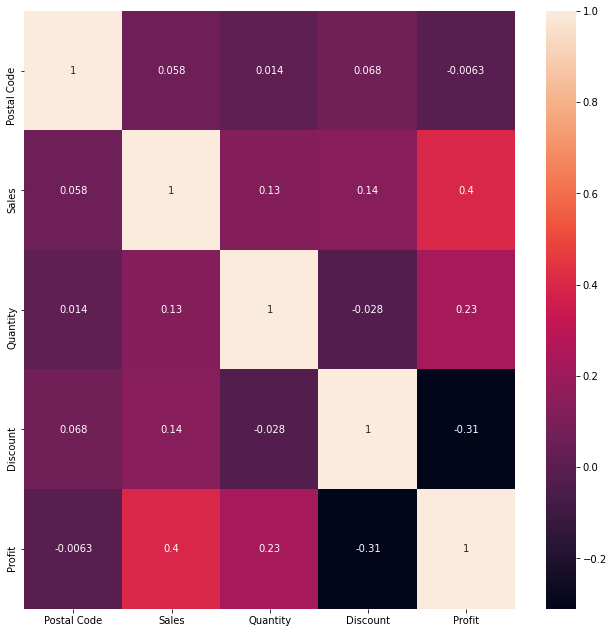

In [ ]:
f,ax=plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

correlation between sales and profit is 0.4 and is positive or good,followed by Quantity and profit that os 0.23

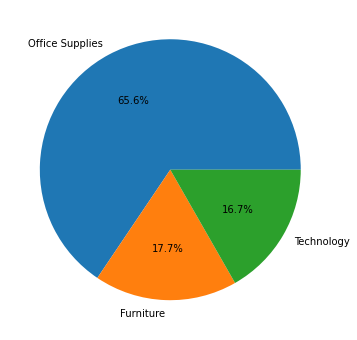

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

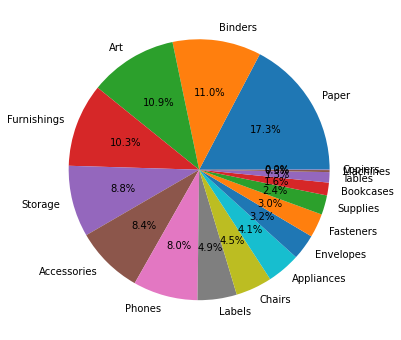

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

<BarContainer object of 7143 artists>

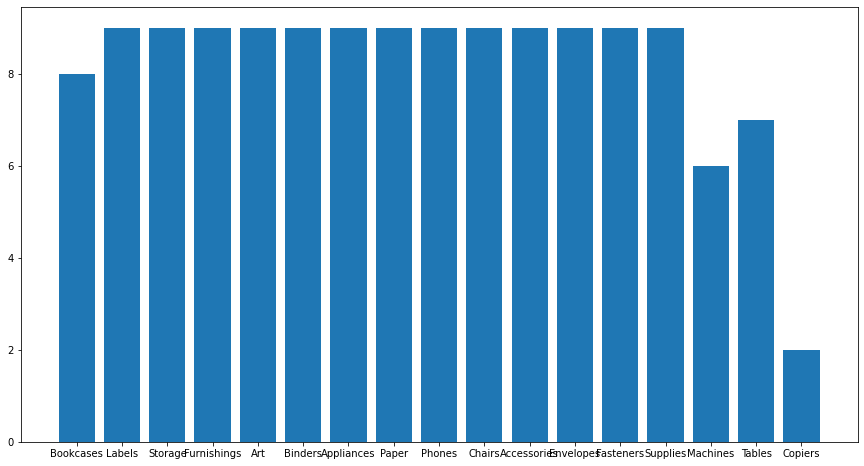

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))

ax.bar(df['Sub-Category'],df['Quantity'])




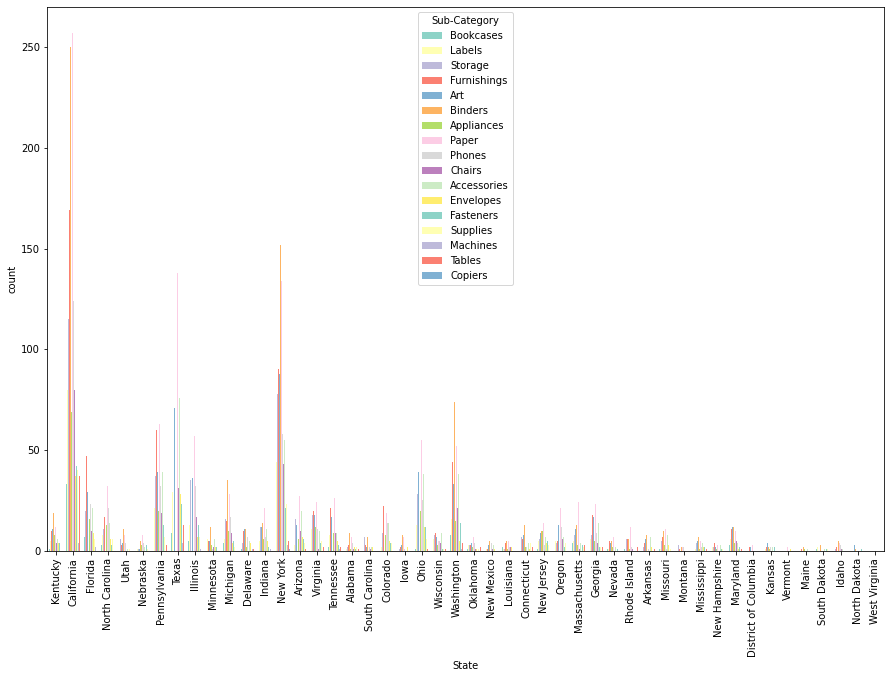

In [ ]:
#Counterplot
plt.figure(figsize=(15,10))
sns.countplot(x=df['State'],hue=df['Sub-Category'],palette='Set3',saturation=1,linewidth=30)
plt.xticks(rotation=90)
plt.show()

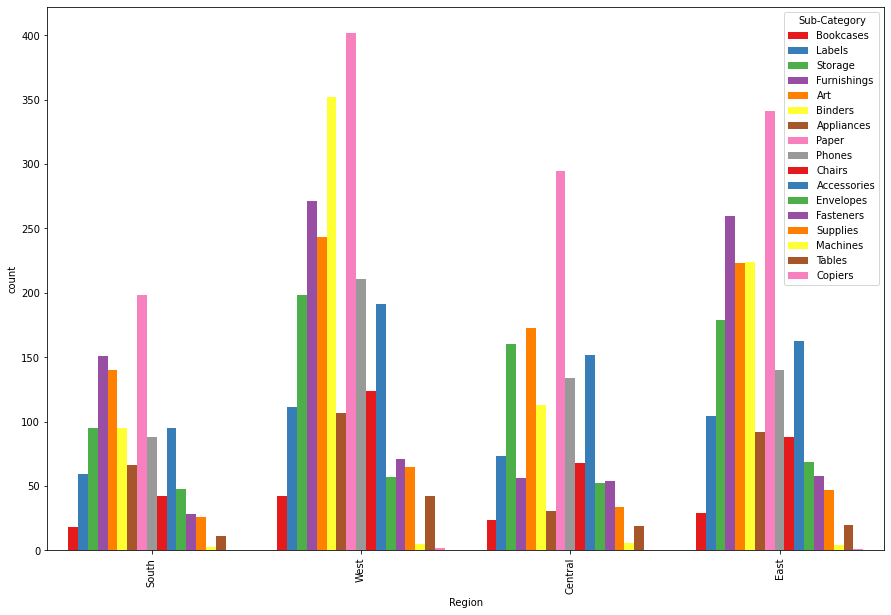

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Region'],hue=df['Sub-Category'],palette='Set1',saturation=1,linewidth=30)
plt.xticks(rotation=90)
plt.show()

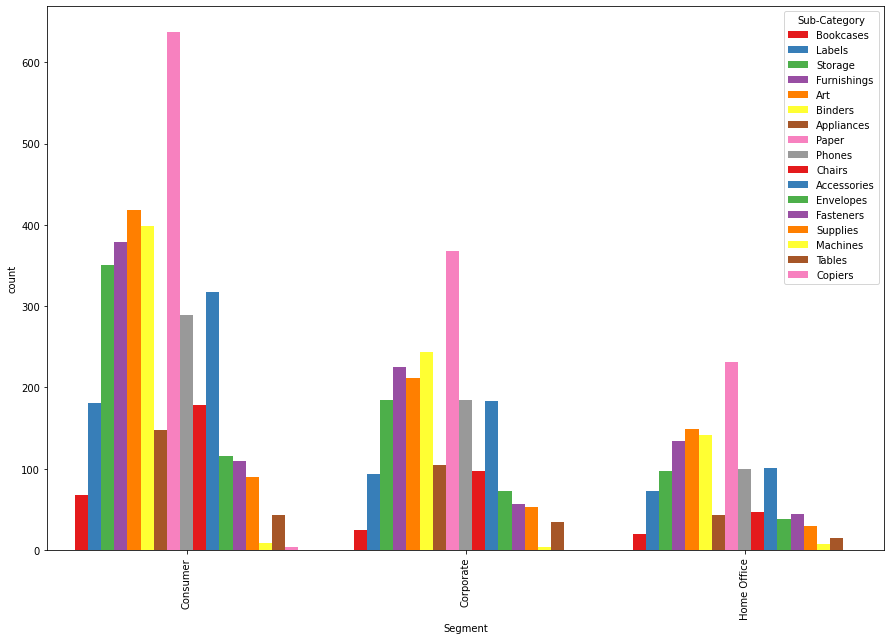

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Segment'],hue=df['Sub-Category'],palette='Set1',saturation=1,linewidth=30)
plt.xticks(rotation=90)
plt.show()

<BarContainer object of 7143 artists>

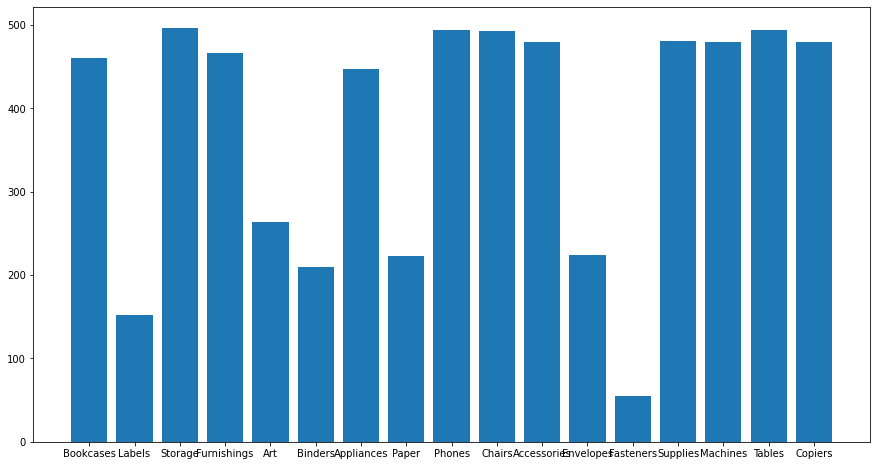

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))

ax.bar(df['Sub-Category'],df['Sales'])


<BarContainer object of 7143 artists>

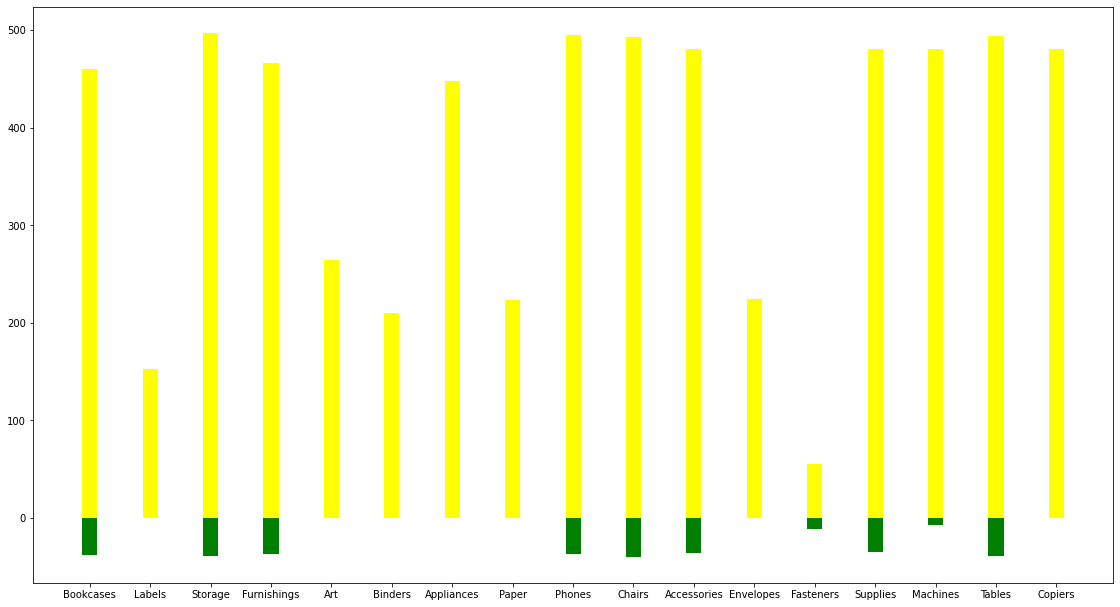

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))

ax=fig.add_axes([0,0,1,1])
x=df['Sub-Category']
ax.bar(x,df['Profit'],color='green',width=0.25)
ax.bar(x,df['Sales'],color='yellow',width=0.25)


**Insights and analysis of following Dataset-** 
1. There is noticable positive correlation between a)Sales & Profit b)Quantity & Profit
2. There is maximum demand of office supplies followed by technology and furniture
3. quantity of items  (Book cases,machines and Tables) are less in number,copiers are least in number
4. we maximum number of purchases are made from States of California,Newyork and Texas followed by noticable number of purchases done in states of Washington,Pennsylvania and Illionis.But number of purchases in other States are very less
5. We also see the n.o of purchases per region and per segment, We see Consumer
segment makes more purchases
6. We see from sales and Profit sacked bar Graph that though Sales are much more
profit is really less for some items likes Appliances and Copiers though Sales is very high there is  negligible profit which is point of concern 
7. First should focus on remaining states other than six,analysing reasons as to why there are very less purchases there to increase profit
8. Seeing that there is vast difference between Sales and Profit Company must analyse and try to minimize expenses on over heads,shipment,they can build their
sub centres so that at one they can ship product in a bulk to a subcentre and subcentres can deliver to customers in their region than individually shipping 
 
 


